# 다항 회귀

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc+'life_expectancy.csv')
life.head()

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Polio',
             'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace=True)
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP',
          'Thinness 1-19 years']]
y = life['Life expectancy']

In [2]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 3)
X = poly_feature.fit_transform(X)

Mean squared error: 39.797992758050654


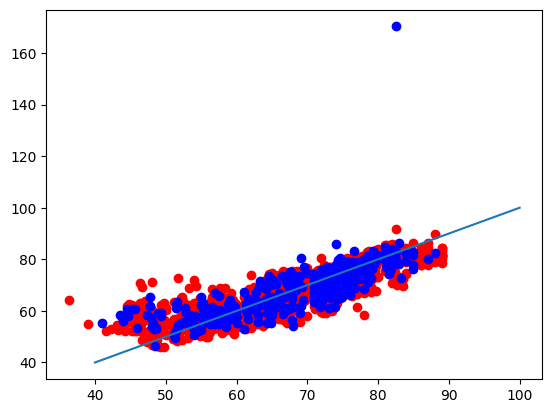

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot([40, 100], [40, 100])
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

## 다항회귀 문제점: 과적합 및 복잡도 증가

In [4]:
print('Mean squared error: ', mean_squared_error(y_train, y_hat_train))

Mean squared error:  22.86795020087786


In [6]:
X.shape

(2306, 84)

## sklearn의 결정트리로 붓꽃 분류하기

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

## SVM 실습

In [11]:
import pandas as pd
import numpy as np
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(5)

,x1,x2,y
995,2.664896,-33.240534,0
996,-2.019928,5.687221,1
997,-4.634470,5.102681,1
998,1.426275,-47.015037,0
999,1.988053,24.930404,0


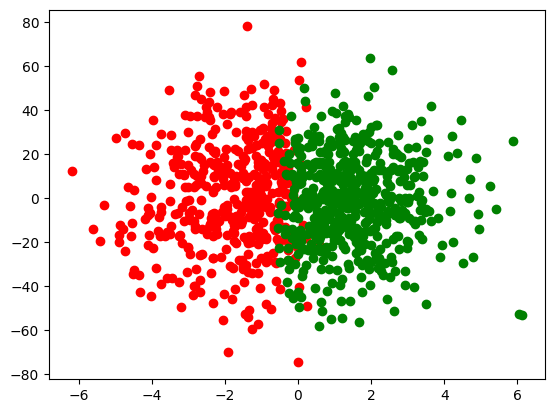

In [12]:
df_positive = df[df['y']>0]
df_negative = df[df['y']==0]
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [13]:
from sklearn.svm import LinearSVC
X = df[['x1', 'x2']].to_numpy()
y = df['y']
svm_simple = LinearSVC(C=1, loss='hinge')
svm_simple.fit(X, y)

c:\Users\김남현\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge')

In [14]:
svm_simple.predict([[0.12, 0.56], [-4, 40], [0, 40], [5, 20]])

array([0, 1, 0, 0], dtype=int64)

c:\Users\김남현\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


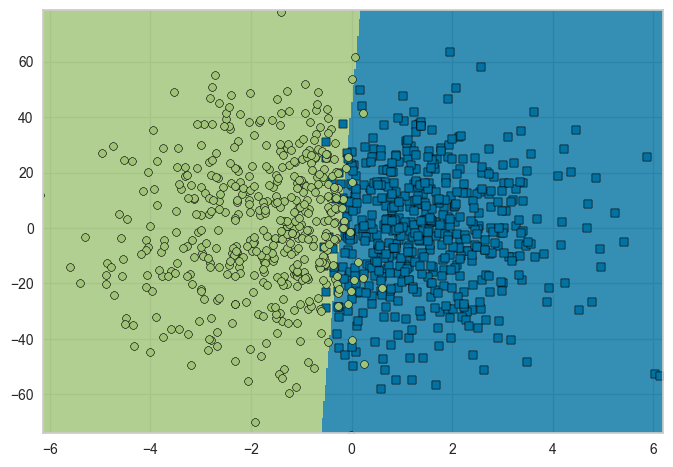

In [15]:
from yellowbrick.contrib.classifier import DecisionViz
viz = DecisionViz(svm_simple, title='linear SVM')
viz.fit(X, y)
viz.draw(X, y)